In [1]:
from evaluate_line_segment import evaluate_line_segment
from utils import line_to_eval_line, eval_param_struct
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib widget


In [2]:
WIDTH, HEIGHT = 100, 100

REF_COLOR = [0, 255, 0]
TEST_COLOR = [0,   0, 0]

PI = 3.14

rect = [0, 0, WIDTH, HEIGHT]


In [3]:
def build_image(lines_ref, lines_test):
    img = np.ones((WIDTH, HEIGHT, 3)) * 255

    def put_lines(lines, color):
        for line in lines:
            x1, y1, x2, y2 = line[0], line[1], line[2], line[3]
            cv2.line(img, (x1, y1), (x2, y2), color, 1)

    put_lines(lines_ref, REF_COLOR)
    put_lines(lines_test, TEST_COLOR)

    return img


def list2eval_line(l):
    ml = np.array(l)
    ret = line_to_eval_line(ml)
    return ret


def poc_evaluation_vector(lines_ref, lines_test):
    # Image display
    lines_ref, lines_test = lines_ref.copy(), lines_test.copy()
    image = build_image(lines_ref, lines_test)
    plt.figure().clear()
    plt.imshow(image.astype(int))
    plt.show()

    # Evaluation
    lines_ref.insert(0, rect)
    lines_ref, lines_test = list2eval_line(
        lines_ref), list2eval_line(lines_test)
    params = eval_param_struct(10, PI * 5 / 180, .75)
    (pre, rec, iou) = evaluate_line_segment(lines_ref, lines_test, params)
    fscore = 2 * pre * rec / (pre + rec)
    print(f'precision : {pre}\nrecal : {rec}\niou : {iou}\nfscore : {fscore}')


Problème : 

- Cas 5 et 6 : La discontinuité n'est pas sanctionné | Possible solution : precision *= (nb_gt) / (nb_detec)
- Cas 7 : Précision > 1 | Possible solution : Faire un matching pour que les detection match au plus une gt

# Cases

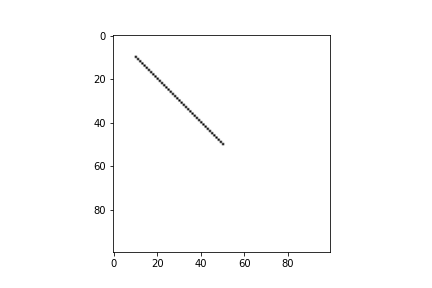

precision : 0.9999999999999999
recal : 0.9999999999999999
iou : 0.9999999999999999
fscore : 0.9999999999999999


In [4]:
# Case 0

c0_points_ref = [[10, 10, 50, 50]]
c0_points_test = c0_points_ref.copy()

poc_evaluation_vector(c0_points_ref, c0_points_test)

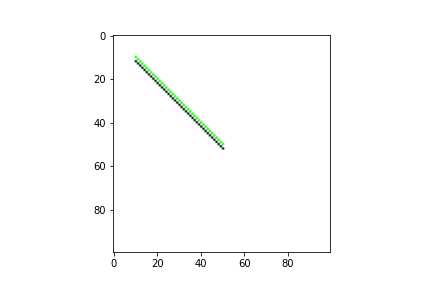

precision : 0.975
recal : 0.975
iou : 0.975
fscore : 0.975


In [5]:
# Case 1

c1_points_ref = [[10, 10, 50, 50]]
c1_points_test = [[10, 12, 50, 52]]

poc_evaluation_vector(c1_points_ref, c1_points_test)


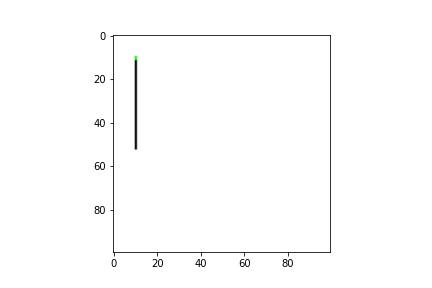

precision : 0.95
recal : 0.95
iou : 0.95
fscore : 0.9500000000000001


In [6]:
# Case 2

c2_points_ref = [[10, 10, 10, 50]]
c2_points_test = [[10, 12, 10, 52]]

poc_evaluation_vector(c2_points_ref, c2_points_test)


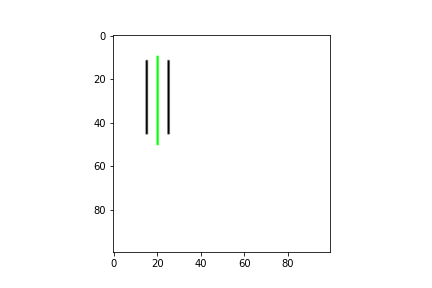

precision : 1.0
recal : 0.825
iou : 1.0
fscore : 0.9041095890410958


In [7]:
# Case 3

c3_points_ref = [[20, 10, 20, 50]]
c3_points_test = [[15, 12, 15, 45], [25, 12, 25, 45]]

poc_evaluation_vector(c3_points_ref, c3_points_test)


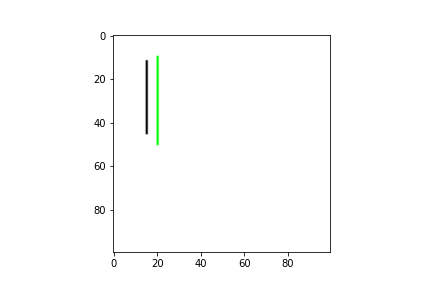

precision : 1.0
recal : 0.825
iou : 1.0
fscore : 0.9041095890410958


In [8]:
# Case 4

c4_points_ref = [[20, 10, 20, 50]]
c4_points_test = [[15, 12, 15, 45]]

poc_evaluation_vector(c4_points_ref, c4_points_test)


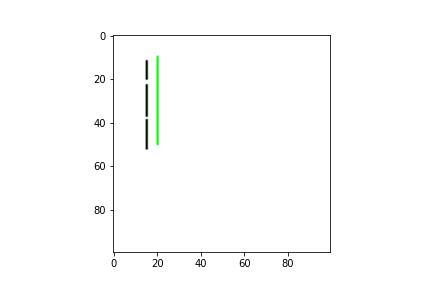

precision : 0.9428571428571428
recal : 0.825
iou : 0.9428571428571428
fscore : 0.88


In [9]:
# Case 5

c5_points_ref = [[20, 10, 20, 50]]
c5_points_test = [[15, 12, 15, 20], [15, 23, 15, 37], [15, 39, 15, 52]]

poc_evaluation_vector(c5_points_ref, c5_points_test)


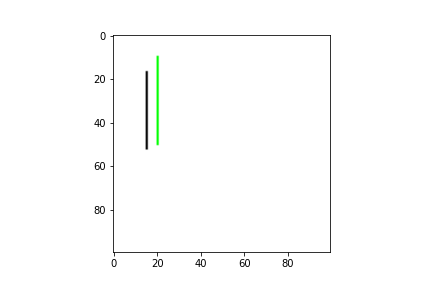

precision : 0.9428571428571428
recal : 0.825
iou : 0.9428571428571428
fscore : 0.88


In [10]:
# Case 6

c6_points_ref = [[20, 10, 20, 50]]
c6_points_test = [[15, 17, 15, 52]]

poc_evaluation_vector(c6_points_ref, c6_points_test)


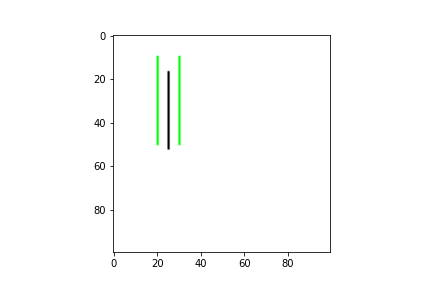

precision : 1.8857142857142857
recal : 0.825
iou : 0.9428571428571428
fscore : 1.1478260869565218


In [11]:
# Case 7

c7_points_ref = [[20, 10, 20, 50], [30, 10, 30, 50]]
c7_points_test = [[25, 17, 25, 52]]

poc_evaluation_vector(c7_points_ref, c7_points_test)


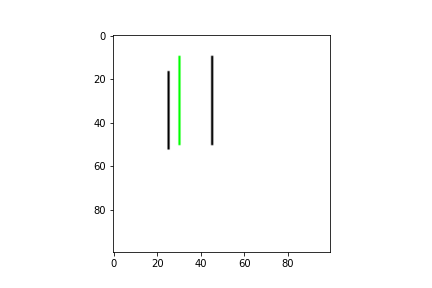

precision : 0.44
recal : 0.825
iou : 0.9428571428571428
fscore : 0.5739130434782609


In [12]:
# Case 8

c8_points_ref = [[30, 10, 30, 50]]
c8_points_test = [[25, 17, 25, 52], [45, 10, 45, 50]]

poc_evaluation_vector(c8_points_ref, c8_points_test)


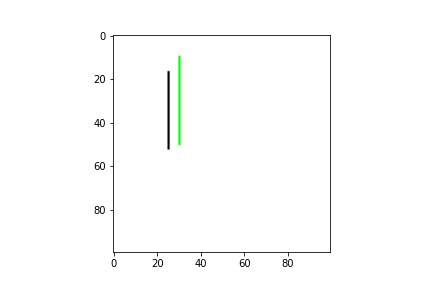

precision : 0.9428571428571428
recal : 0.825
iou : 0.9428571428571428
fscore : 0.88


In [13]:
# Case 9

c9_points_ref = [[30, 10, 30, 50]]
c9_points_test = [[25, 17, 25, 52]]

poc_evaluation_vector(c9_points_ref, c9_points_test)


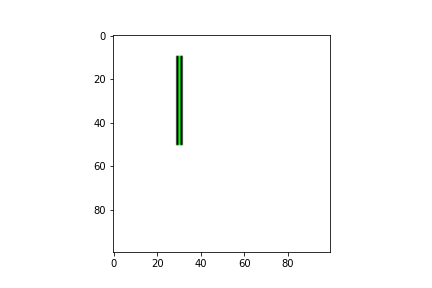

precision : 1.0
recal : 1.0
iou : 1.0
fscore : 1.0


In [14]:
# Case 10

c10_points_ref = [[30, 10, 30, 50]]
c10_points_test = [[29, 10, 29, 50], [31, 10, 31, 50]]

poc_evaluation_vector(c10_points_ref, c10_points_test)